Initial setup

In [1]:
%run "Common setup.ipynb"

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))

<hr> 

Loading in previously sorted information on UASA software


In [3]:
relevant_software_pubs = pd.read_csv('{}/relevant_UASA_software_papers.csv'.format(DATA_DIR), index_col=0)

title_list = [t for t in relevant_software_pubs.title]
relevant_pubs = wosis.find_pubs_by_title(RC, title_list)

In [4]:
relevant_pubs.name = 'Relevant Software Publications'

In [5]:
sorted_software = pd.read_csv('{}/uasa_software_phrases_sorted_2019-03-01.csv'.format(DATA_DIR))
sorted_software.groupby('relevant')['title'].count()

relevant
?                                     31
No                                    39
No (not related to environment)       37
No - not relevant to environment       2
Yes                                   38
Yes - ARRAMIS                          1
Yes - BAT                              1
Yes - BMP Toolbox                      1
Yes - COMPARE                          1
Yes - Chaospy                          1
Yes - Crystal Ball (Excel)             1
Yes - DAKOTA                           1
Yes - DMMAP                            1
Yes - DUE                              1
Yes - DUET-H                           1
Yes - FReET                            1
Yes - GLUE                             1
Yes - GRIP                             1
Yes - GSAT                             1
Yes - GTApprox                         1
Yes - GUI-HDMR                         1
Yes - GUM                              1
Yes - HSPF                             1
Yes - IPH-TRIM3D                       1
Yes - M

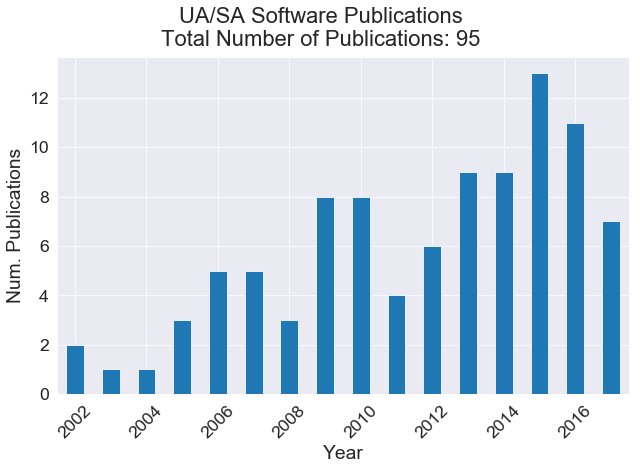

In [6]:
wos_plot.plot_pub_trend(relevant_pubs, title='UA/SA Software Publications')

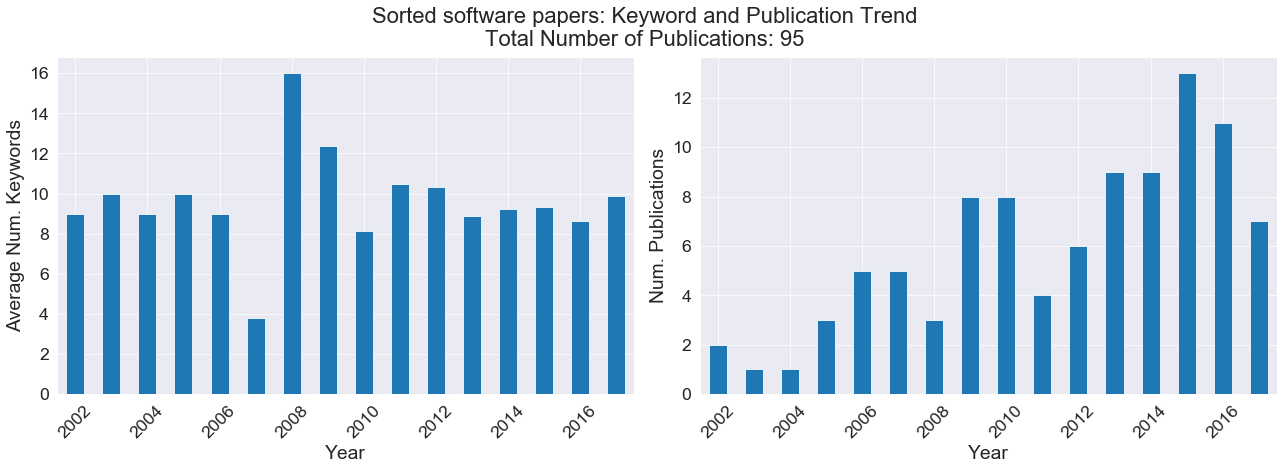

In [7]:
wos_plot.plot_kw_trend(relevant_pubs, title='Sorted software papers: Keyword and Publication Trend')

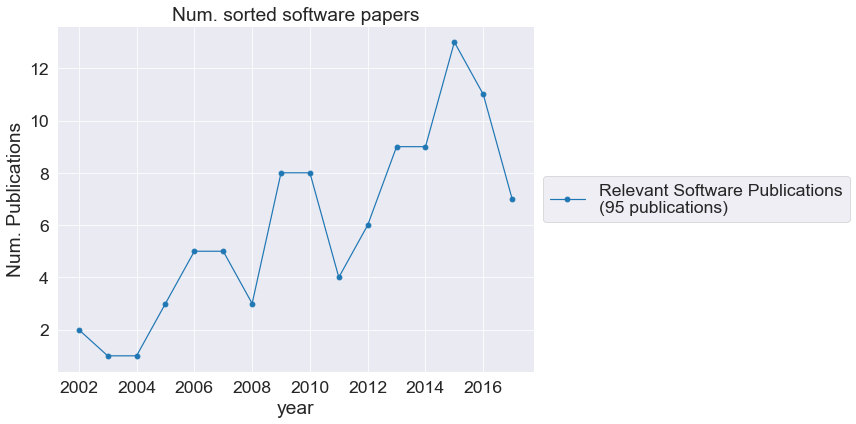

In [8]:
wos_plot.plot_topic_trend([relevant_pubs], total_rc=False, title='Num. sorted software papers')

In [9]:
relevant_pubs.name = 'Sorted Software Packages'
wos_plot.plot_topic_trend([relevant_pubs], total_rc=RC, title='Sorted software papers\n(Perc. of Filtered Corpora))

SyntaxError: EOL while scanning string literal (<ipython-input-9-c7ecdf834112>, line 2)

In [ ]:
wos_plot.plot_pubs_per_journal(relevant_pubs, top_n=5, annotate=True, show_stats=True)

In [ ]:
journals_of_interest_software = list(map(str.upper, ['Environmental Modelling & Software', 'Journal of Hydrology', 
                                                     'Computers & Geosciences', 'Hydrology and Earth System Sciences', 
                                                     'Advances in Engineering Software']))

pubs_for_journals_software = wosis.find_pubs_by_journal(relevant_pubs, journals_of_interest_software)

In [ ]:
# Get citations for each paper
paper_citations_per_journal_software = {}
for journal in pubs_for_journals_software:
    fn = '{}/collection_software_{}_2019-03-15'.format(TMP_DIR, journal)
    paper_citations_per_journal_software[journal] = wosis.get_num_citations(pubs_for_journals_software[journal], 
                                                                            WOS_CONFIG,
                                                                            cache_as=fn)

In [ ]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_software = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_software.items():
    df = wosis.link_to_pub(df)
    df['journal'] = df['SO']
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)

    collection_software = collection_software.append(df[cols_of_interest][0:10], ignore_index=True)

In [ ]:
top_cited_in_top_journals_software = collection_software.sort_values('citations', ascending=False)
top_cited_in_top_journals_software.head(10)

In [ ]:
top_cited_in_top_journals_software.to_csv('{}/top_cited_sorted_software_papers.csv'.format(DATA_DIR))